<a href="https://colab.research.google.com/github/MAHESWARI-ROUT/Car_price_prediction/blob/main/car_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('car data.csv')

In [ ]:
df.tail(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
278,jazz,2016,6.00,8.40,4000,Petrol,Dealer,Manual,0
187,Honda CB twister,2013,0.25,0.51,32000,Petrol,Individual,Manual,0
283,city,2016,8.99,11.80,9010,Petrol,Dealer,Manual,0
201,i20,2010,3.25,6.79,58000,Diesel,Dealer,Manual,1
126,Bajaj Avenger 220,2017,0.90,0.95,1300,Petrol,Individual,Manual,0


In [ ]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [ ]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df['Car_age'] = 2025 - df['Year']

In [ ]:
df['Car_brand'] = df['Car_Name'].str.split().str[0]

In [ ]:
df['Car_brand'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon', 'swift', 'vitara', 's', 'alto',
       'ertiga', 'dzire', 'ignis', '800', 'baleno', 'omni', 'fortuner',
       'innova', 'corolla', 'etios', 'camry', 'land', 'Royal', 'UM',
       'KTM', 'Bajaj', 'Hyosung', 'Mahindra', 'Honda', 'Yamaha', 'TVS',
       'Hero', 'Activa', 'Suzuki', 'i20', 'grand', 'i10', 'eon', 'xcent',
       'elantra', 'creta', 'verna', 'city', 'brio', 'amaze', 'jazz'],
      dtype=object)

In [ ]:
df.drop(columns=['Car_Name','Year','Owner'],inplace=True)

In [ ]:
df

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Car_age,Car_brand
0,3.35,5.59,27000,Petrol,Dealer,Manual,11,ritz
1,4.75,9.54,43000,Diesel,Dealer,Manual,12,sx4
2,7.25,9.85,6900,Petrol,Dealer,Manual,8,ciaz
3,2.85,4.15,5200,Petrol,Dealer,Manual,14,wagon
4,4.60,6.87,42450,Diesel,Dealer,Manual,11,swift
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,9,city
297,4.00,5.90,60000,Petrol,Dealer,Manual,10,brio
298,3.35,11.00,87934,Petrol,Dealer,Manual,16,city
299,11.50,12.50,9000,Diesel,Dealer,Manual,8,city


In [ ]:
skew = df['Selling_Price'].skew()
print(skew)

2.493422417797524


In [ ]:
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


<Axes: ylabel='Selling_Price'>

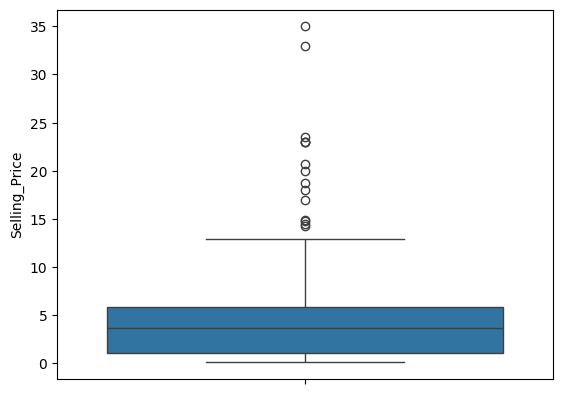

In [ ]:
sns.boxplot(y_train)

In [ ]:
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

4.8125


In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit)
print(upper_limit)

-6.16875
13.08125


In [ ]:
y_train=np.where(y_train>upper_limit,upper_limit,np.where(y_train<lower_limit,lower_limit,y_train))


In [ ]:
y_train = pd.Series(y_train, index=X_train.index)

Ind=y_train[(y_train>upper_limit)|(y_train<lower_limit)].index
df.drop(Ind,inplace=True)

<Axes: >

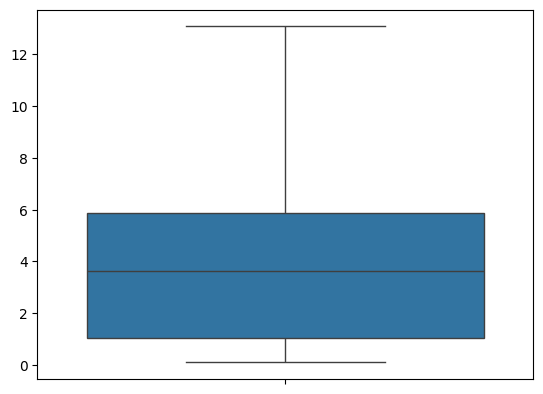

In [ ]:
sns.boxplot(y_train)

In [ ]:
X_train

,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Car_age,Car_brand
235,9.40,15141,Petrol,Dealer,Manual,8,verna
106,3.45,16500,Petrol,Individual,Manual,11,Hyosung
10,3.60,2135,Petrol,Dealer,Manual,8,alto
152,0.99,13000,Petrol,Individual,Manual,13,Bajaj
77,12.35,135154,Petrol,Dealer,Automatic,21,corolla
...,...,...,...,...,...,...,...
75,6.80,36000,Petrol,Dealer,Manual,10,etios
22,8.01,50000,Petrol,Dealer,Automatic,14,sx4
72,18.61,56001,Petrol,Dealer,Manual,12,corolla
15,10.79,43000,Diesel,Dealer,Manual,9,ertiga


<Axes: ylabel='Present_Price'>

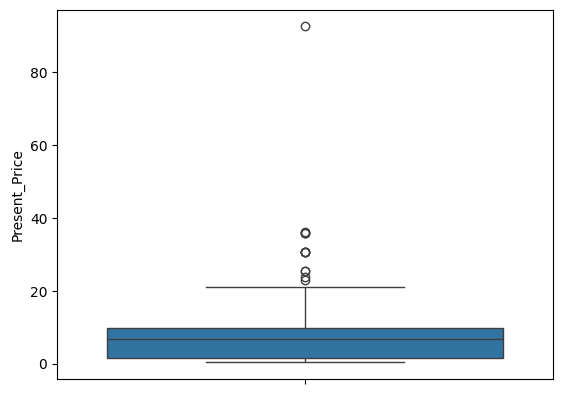

In [ ]:
sns.boxplot(X_train['Present_Price'])

<Axes: ylabel='Driven_kms'>

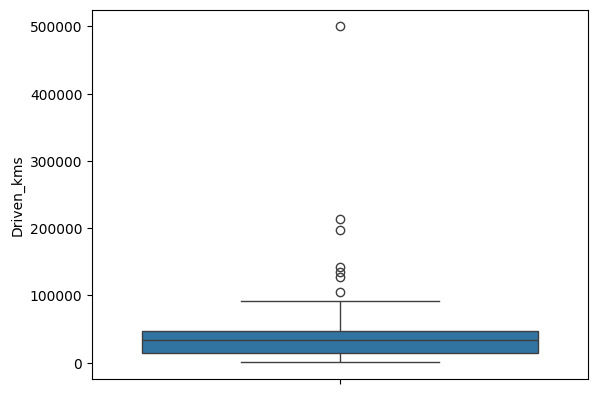

In [ ]:
sns.boxplot(X_train['Driven_kms'])

<Axes: ylabel='Car_age'>

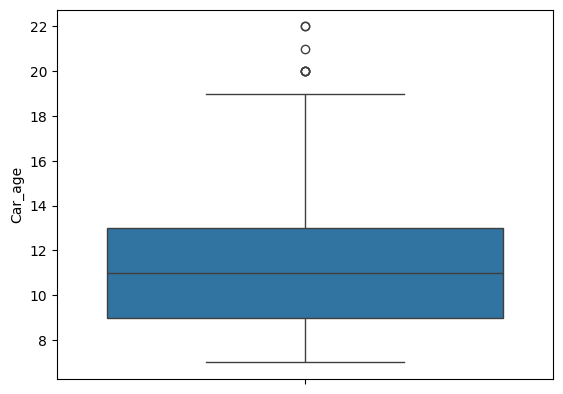

In [ ]:
sns.boxplot(X_train['Car_age'])

<Axes: ylabel='Car_brand'>

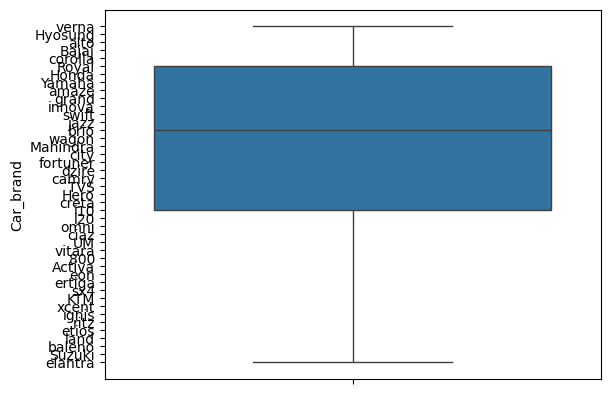

In [ ]:
sns.boxplot(X_train['Car_brand'])

<Axes: ylabel='Fuel_Type'>

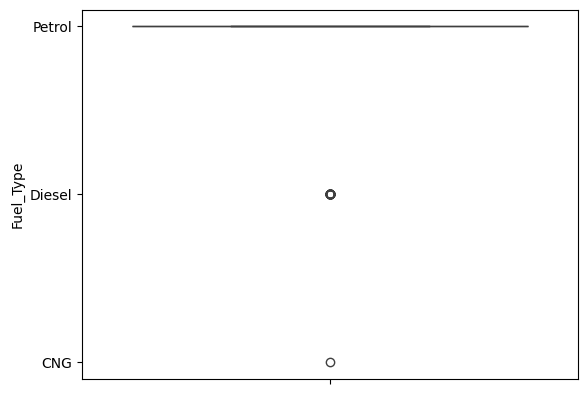

In [ ]:
sns.boxplot(X_train['Fuel_Type'])

<Axes: ylabel='Selling_type'>

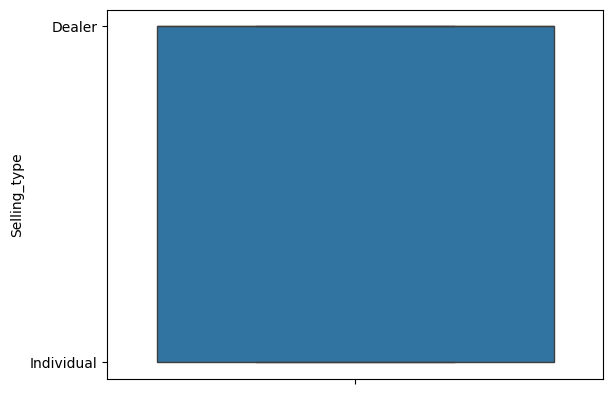

In [ ]:
sns.boxplot(X_train['Selling_type'])

<Axes: ylabel='Transmission'>

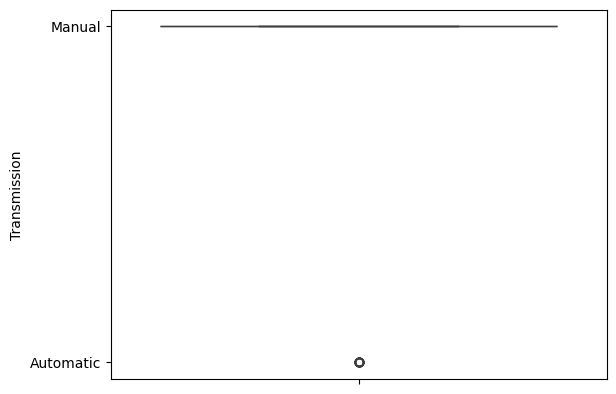

In [ ]:
sns.boxplot(X_train['Transmission'])

In [ ]:
X_train['Driven_kms'].skew()

np.float64(6.462842436652615)

In [ ]:
X_train['Present_Price'].skew()

np.float64(4.3142705195135465)

In [ ]:
Qt1 = X_train['Present_Price'].quantile(0.25)
Qt3 = X_train['Present_Price'].quantile(0.75)
IQR1 = Qt3 - Qt1
print(IQR1)

8.3925


In [ ]:
lower_limit1 = Qt1 - 1.5*IQR1
upper_limit1 = Qt3 + 1.5*IQR1
print(lower_limit1)
print(upper_limit1)

-11.11875
22.45125


In [ ]:
X_train['Present_Price']=np.where(X_train['Present_Price']>upper_limit1,upper_limit1,np.where(X_train['Present_Price']<lower_limit1,lower_limit1,X_train['Present_Price']))

In [ ]:
X_train['Present_Price'].skew()

np.float64(0.9971026705938696)

In [ ]:
In = X_train[(X_train['Present_Price']>upper_limit1)|(X_train['Present_Price']<lower_limit1)].index
df.drop(In,inplace=True)

<Axes: ylabel='Present_Price'>

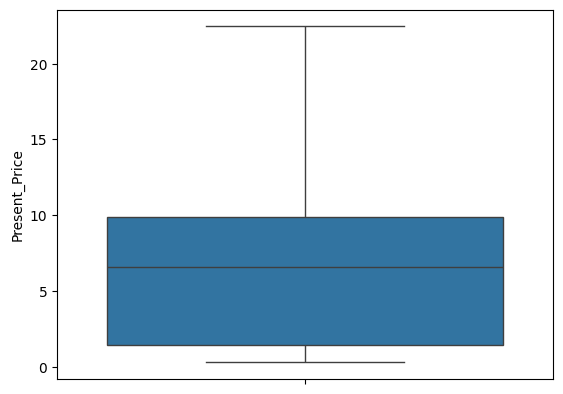

In [ ]:
sns.boxplot(X_train['Present_Price'])

In [ ]:
Qd1 = X_train['Driven_kms'].quantile(0.25)
Qd3 = X_train['Driven_kms'].quantile(0.75)
IQRd = Qd3 - Qd1
print(IQRd)

32250.0


In [ ]:
lower_limitd = Qd1 - 1.5*IQRd
upper_limitd = Qd3 + 1.5*IQRd
print(lower_limitd)
print(upper_limitd)

-33375.0
95625.0


In [ ]:
X_train['Driven_kms']=np.where(X_train['Driven_kms']>upper_limitd,upper_limitd,np.where(X_train['Driven_kms']<lower_limitd,lower_limitd,X_train['Driven_kms']))

In [ ]:
Id = X_train[(X_train['Driven_kms']>upper_limitd)|(X_train['Driven_kms']<lower_limitd)].index
df.drop(Id,inplace=True)

In [ ]:
X_train['Driven_kms'].skew()

np.float64(0.7044370597278968)

<Axes: ylabel='Driven_kms'>

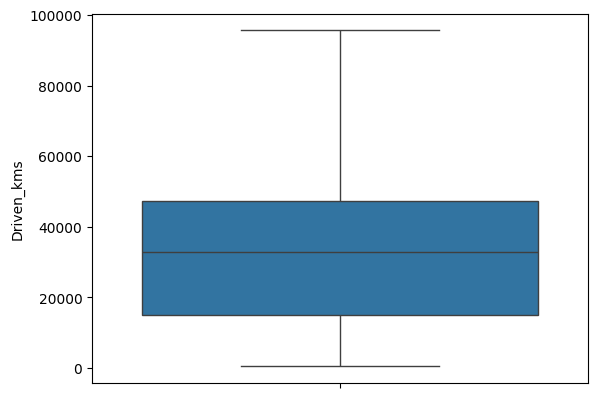

In [ ]:
sns.boxplot(X_train['Driven_kms'])

In [ ]:
Qa1 = X_train['Car_age'].quantile(0.25)
Qa3 = X_train['Car_age'].quantile(0.75)
IQRa = Qa3 - Qa1
print(IQRa)

4.0


In [ ]:
lower_limit = Qa1 - 1.5*IQRa
upper_limit = Qa3 + 1.5*IQRa
print(lower_limit)
print(upper_limit)

3.0
19.0


In [ ]:
X_train['Car_age']=np.where(X_train['Car_age']>upper_limitd,upper_limitd,np.where(X_train['Car_age']<lower_limitd,lower_limitd,X_train['Car_age']))

In [ ]:
Ia = X_train[(X_train['Car_age']>upper_limitd)|(X_train['Car_age']<lower_limitd)].index
df.drop(Id,inplace=True)

<Axes: ylabel='Car_age'>

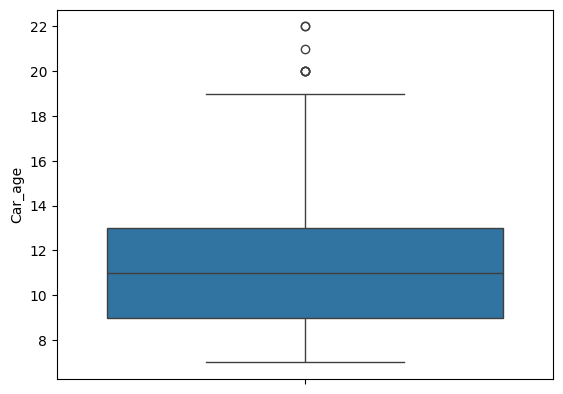

In [ ]:
sns.boxplot(X_train['Car_age'])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
ohe_col = ['Fuel_Type','Selling_type','Transmission', 'Car_brand']
num_col = ['Present_Price','Car_age','Driven_kms']

In [ ]:

from math import remainder
preprocessor = ColumnTransformer([('ohe',OneHotEncoder(handle_unknown='ignore'),ohe_col,),('num',StandardScaler(),num_col)],remainder='passthrough')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)


In [ ]:
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', model)
])

In [ ]:
pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Fuel_Type', 'Selling_type',
                                                   'Transmission',
                                                   'Car_brand']),
                                                 ('num', StandardScaler(),
                                                  ['Present_Price', 'Car_age',
                                                   'Driven_kms'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_test)


In [ ]:
y_pred


array([ 9.858    ,  0.5343   ,  3.9925   ,  3.2355   , 10.91015  ,
        4.8575   ,  3.2065   ,  6.9795   ,  0.2477   ,  5.743    ,
        7.4227   ,  4.184    ,  0.3253   ,  8.6814   ,  2.539    ,
        0.6969   ,  0.6546   ,  0.4465   , 11.3668125,  4.083    ,
        1.2625   ,  7.5554375,  0.458    ,  9.3605   ,  0.5989   ,
        7.536    ,  0.5818   ,  0.2379   ,  3.086    ,  2.2495   ,
        0.4555   ,  3.0535   ,  6.19     ,  8.7720125,  0.4625   ,
        5.1181   ,  8.349    ,  5.526    ,  7.3405   ,  4.9225   ,
       11.884375 ,  0.7387   ,  0.4079   ,  0.5005   ,  6.3385   ,
        8.4148   ,  0.3287   ,  5.0794   , 12.7445   ,  2.706    ,
        7.593    ,  0.4971   ,  6.9348125,  0.5551   ,  0.7414   ,
        0.4873   ,  0.4044   ,  5.5760625,  0.5121   ,  0.2022   ,
        9.0365   ])

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred=y_pred)

# Print the MSE
print("Mean Squared Error:", mse)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.4178257161296193
Mean Squared Error: 1.4178257161296193


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MSE: 1.42
RMSE: 1.19
R² Score: 0.92


In [ ]:
X_test

,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Car_age,Car_brand
99,20.450,50024,Diesel,Dealer,Manual,15,fortuner
161,0.826,23000,Petrol,Individual,Manual,11,TVS
89,6.760,40000,Petrol,Dealer,Manual,11,etios
30,5.980,51439,Diesel,Dealer,Manual,13,ritz
232,14.790,12900,Petrol,Dealer,Automatic,10,elantra
...,...,...,...,...,...,...,...
172,0.640,13700,Petrol,Individual,Manual,11,Bajaj
94,22.780,89000,Petrol,Dealer,Automatic,17,corolla
160,0.950,24000,Petrol,Individual,Manual,14,Bajaj
199,0.580,53000,Petrol,Individual,Manual,18,Honda


In [ ]:
sample_input = {
    'Present_Price': 20.450,
    'Driven_kms': 50024,
    'Car_age': 15,
    'Fuel_Type': 'Diesel',
    'Transmission': 'Manual',
    'Selling_type': 'Dealer',
    'Car_brand': 'fortuner'

}

In [ ]:
input_df = pd.DataFrame([sample_input])

# Predict
predicted_price = pipeline.predict(input_df)
print(f"Predicted Selling Price: ₹{predicted_price[0]:.2f} ")

Predicted Selling Price: ₹9.86 


In [ ]:
X_test.loc[99]

,99
Present_Price,20.45
Driven_kms,50024
Fuel_Type,Diesel
Selling_type,Dealer
Transmission,Manual
Car_age,15
Car_brand,fortuner


In [ ]:
y_test[99]

np.float64(9.65)